Calculate learning capability
==============

In [1]:
import cirq
from methods.notebook_utils import run_experiments
from methods.plot_utils import get_data, plot_lc_with_avg
from methods.plot_utils import get_coeffs_data, plot_sampled_coeff

The quantum circuits are defined by configuration dictionaries. Two examples can be found in the folder `./configs/`.\
As a starting point, the content can be copied to the next cell.

A detailed description of each field is given in the following:

ANSATZ specifies whether to build layered "WSW" or dissipative quantum neural network "DQNN".

| FUNC_CONFIG       | Description                         | Options                                      |
|:------------------|:------------------------------------|:---------------------------------------------|
| degree            | degree of truncated Fourier series  | \{1,.., 12\}                                 |
| load_coefficients | name of file for stored coefficients | c\_50\_a, c\_50\_alt for maximal degree 6    |
|                   |                                     | c\_100\_a, c\_100\_alt for maximal degree 12 |
| n_functions       | how many functions should be used   | default and maximum is 100                   |


| SAMPLE_CONFIG     | Description                                             | Options                     |
|:------------------|:--------------------------------------------------------|:----------------------------|
| n_samples         | Amount of initilizations used for sampling coefficients | default 100                 |
|                   |                                                         | 0 if no samples should be created|


| QUANTUM_CONFIG    | Description                                          | Options                           |
|:------------------|:-----------------------------------------------------|:----------------------------------|
| arch              | WSW: number of qubits $q$ and layers $l$: $[q,l]$    | $$q\in \{1, \ldots, 12\}$$        |
|                   | DQNN: number of qubits per (hidden) layer $l_h$: $$[q_{l_0},q_{l_1}, \ldots,q_{l_L}]$$   | $q_{l_h}\in \{1, \ldots, 6\}$ |
| zero_layer        | Apply parametrized layer before first data encoding  | $$\{\text{True}, \text{False}\}$$ |
| trainable_input   | Multiply trainable parameters with input values      | default False (not used in this work)               |
| data_reupload     | Repeat data encoding layer                           | $$\{\text{True}, \text{False}\}$$ |
| activition        | Apply activation function on input values            | default False (not used in this work)               |
| entanglement_gate | Type of entanglement gates                           | $$\{\text{CZ}, \text{CNOT}, \text{CRX}, \text{CAN}\}$$ |
| entanglement_layers | WSW: Number of entanglement layers                 | $$\{1, \ldots, 3\}$$              |
|                     | DQNN: not defined                                  | default 1                         |
| entanglement_type | WSW: link last qubit with first or don't            | $$\{\text{linear},\text{cyclic}\}$$|
|                   | DQNN: not defined                                    | default empty                     |
| entanglement_structure | WSW: how entanglement layers are structured     | $$\{\text{simple},\text{strong}\},\text{strongc14}\}$$    |
|                   | DQNN: not defined                               | default empty                     |
| input_gates       | Gates used for angle input encoding                  | default cirq.rx                   |
| unitary_gates     | Gates used for paramterized rotation                 | e.g. \[cirq.ry, cirq.rz\]         |
| repetitions       | None for analytic evaluation of exp. value, otherwise specifies the amount of shots used to determine the expectation value | e.g. None or 2k |

In [2]:
ANSATZ = ["WSW"]

FUNC_CONFIG = dict(
    degree=6,
    load_coefficients="c_50_a",
    n_functions=5,  # currently == 5 to reduce runtime. Default == 100
)

SAMPLE_CONFIG = dict(
    n_samples=100,
)

QUANTUM_CONFIG = dict(
    arch=[2, 3],
    zero_layer=True,
    trainable_input=False,
    data_reupload=True,
    activition=None,
    entanglement_layers=2,
    entanglement_gate="CRX",
    entanglement_type="linear",
    entanglement_structure="simple",
    input_gates=[cirq.rx],
    unitary_gates=[cirq.ry, cirq.rz],
    repetitions=None,
)

The following `run_experiments` method loads the configuration files, trains to fit the Fourier series based on the specified set, and samples the coefficients.

It creates plots for both experiments and returns the path to the saved raw data for training `func_file_path` and sampling `coeff_file_path`.

%%%%%%%%%%%  Configuration  %%%%%%%%%%%
{'arch': [2, 3], 'zero_layer': True, 'trainable_input': False, 'data_reupload': True, 'activition': None, 'entanglement_layers': 2, 'entanglement_gate': 'CRX', 'entanglement_type': 'linear', 'entanglement_structure': 'simple', 'input_gates': [<function rx at 0x7f2e591a03a0>], 'unitary_gates': [<function ry at 0x7f2e591271f0>, <function rz at 0x7f2e59127430>], 'repetitions': None, 'circuit_type': 'pqc'}

%%%%%%%%%%%  Circuit  %%%%%%%%%%%
(0, 0): ───Ry(train_0_0_0)───Rz(train_0_0_1)───────────────────────────────────────@─────────────────────Ry(train_0_0_2)───Rz(train_0_0_3)───────────────────────────────────────@─────────────────────Rx(in_0_1_0)──────────────────Ry(train_0_1_0)───Rz(train_0_1_1)───────────────────────────────────────@─────────────────────Ry(train_0_1_2)───Rz(train_0_1_3)───────────────────────────────────────@─────────────────────Rx(in_0_2_0)──────────────────Ry(train_0_2_0)───Rz(train_0_2_1)───────────────────────────────────────

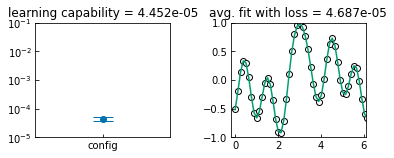

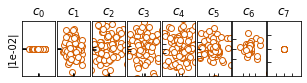

In [3]:
func_file_path, coeff_file_path = run_experiments(
    ANSATZ, QUANTUM_CONFIG, FUNC_CONFIG, SAMPLE_CONFIG
)

# Load data manually

In [4]:
# load a file by defining the path + filename
files = {
    "pqc_q4-l3": "./results/own/WSW_q4_l3_zlTrue_drTrue_el3_linear_simple_rx_ryrz_None_entanglement_gate/functs_WSW_q4_l3_zlTrue_drTrue_el3_linear_simple_rx_ryrz_None_entanglement_gate_run_2023-03-09_13-34",
    # "dqnn_2221": "./results/own/DQNN_q[2, 2, 2, 1]_zlTrue_drTrue_el1_rx_ryrz_None_entanglement_gate/functs_DQNN_q[2, 2, 2, 1]_zlTrue_drTrue_el1_rx_ryrz_None_entanglement_gate_run_2023-03-10_11-16",
}

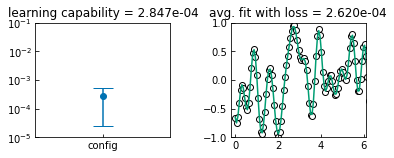

In [5]:
# load function data
(
    coeffs_files_list,
    all_model_histories_length,
    all_model_histories_last,
    all_model_parameters,
    all_ansaetze,
    run_names,
    file_names,
    x_test,
    all_y_test,
    all_model_results,
) = get_data(files)

# plot function
plot_lc_with_avg(x_test, all_y_test, all_model_results, all_model_histories_last)

In [6]:
coeffs_files = {
    "pqc_q4-l3": "./results/own/WSW_q4_l3_zlTrue_drTrue_el3_linear_simple_rx_ryrz_None_entanglement_gate/coeffs_WSW_q4_l3_zlTrue_drTrue_el3_linear_simple_rx_ryrz_None_entanglement_gate_run_2023-03-09_13-35",
    # "dqnn_2221": "./results/own/DQNN_q[2, 2, 2, 1]_zlTrue_drTrue_el1_rx_ryrz_None_entanglement_gate/coeffs_DQNN_q[2, 2, 2, 1]_zlTrue_drTrue_el1_rx_ryrz_None_entanglement_gate_run_2023-03-10_11-16"
}

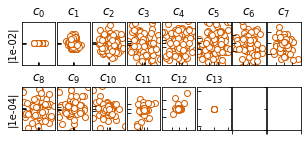

In [7]:
# load coeffecients data
(
    all_model_coeffs,
    all_model_parameters,
    all_ansaetze,
    all_n_coeffs,
    file_names,
) = get_coeffs_data(coeffs_files)

# plot coefficients
plot_sampled_coeff(all_model_coeffs, all_n_coeffs)